In [140]:
#import pandas and dataset for clustering
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/bhusal-ujjwal/exp_life/main/exp_life.csv")

In [141]:
data.head()

,Country,Status,Life expectancy,GDP
0,Afghanistan,Developing,65.0,584.259210
1,Albania,Developing,77.8,3954.227830
2,Algeria,Developing,75.6,4132.762920
3,Angola,Developing,52.4,3695.793748
4,Antigua and Barbuda,Developing,76.4,13566.954100


In [142]:
data.tail()

,Country,Status,Life expectancy,GDP
178,Venezuela (Bolivarian Republic of),Developing,74.1,NaN
179,Viet Nam,Developing,76.0,NaN
180,Yemen,Developing,65.7,NaN
181,Zambia,Developing,61.8,1313.889646
182,Zimbabwe,Developing,67.0,118.693830


In [143]:
data.shape

(183, 4)

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          183 non-null    object 
 1   Status           183 non-null    object 
 2   Life expectancy  183 non-null    float64
 3   GDP              154 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.8+ KB


In [145]:
data.describe()

,Life expectancy,GDP
count,183.000000,154.000000
mean,71.616940,7185.331746
std,8.123706,11697.508913
min,51.000000,33.681223
25%,65.750000,766.008101
50%,73.900000,2916.228918
75%,76.950000,7290.107448
max,88.000000,66346.522670


In [146]:
#now fill all columns with null values of GDP with mean value of respective columns
data["GDP"] = data["GDP"].fillna(data["GDP"].mean())

In [147]:
#filled the null GDP with average values of the GDP
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          183 non-null    object 
 1   Status           183 non-null    object 
 2   Life expectancy  183 non-null    float64
 3   GDP              183 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.8+ KB


In [148]:
data.corr()

,Life expectancy,GDP
Life expectancy,1.000000,0.424769
GDP,0.424769,1.000000


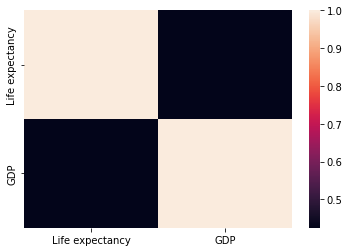

In [149]:
import seaborn as sns
sns.heatmap(data.corr())

In [150]:
import matplotlib.pyplot as plt
import numpy as np

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          183 non-null    object 
 1   Status           183 non-null    object 
 2   Life expectancy  183 non-null    float64
 3   GDP              183 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.8+ KB


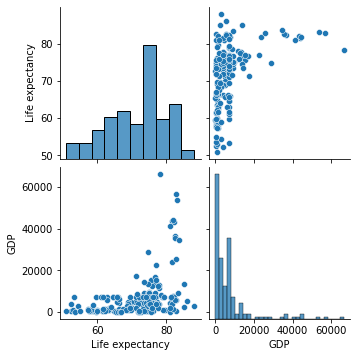

In [152]:
#creating pair plot
sns.pairplot(data)

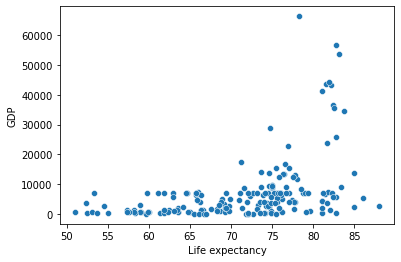

In [153]:
#scatterplot for life expectancy and gdp without hue
sns.scatterplot(data=data, x= "Life expectancy", y = "GDP")

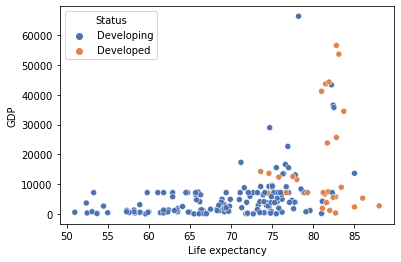

In [154]:
#scatterplot for life expectancy and gdp with hue
sns.scatterplot(data=data, x= "Life expectancy", y = "GDP",palette="deep", hue = "Status")

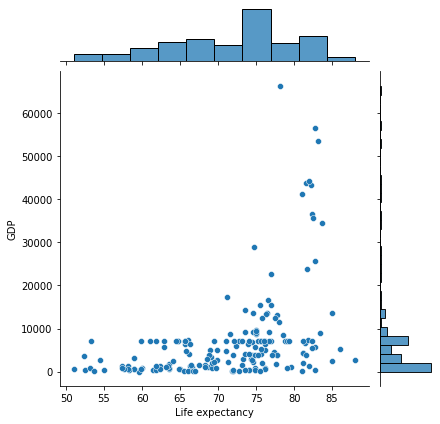

In [155]:
#jointplot for life expectancy and gdp without hue
sns.jointplot(data=data, x= "Life expectancy", y = "GDP")

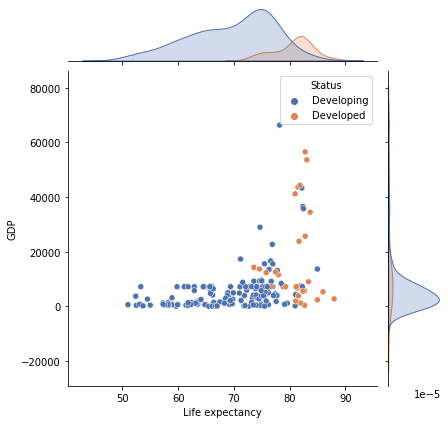

In [156]:
#jointplot for life expectancy and gdp with hue
sns.jointplot(data=data, x= "Life expectancy", y = "GDP",palette="deep", hue = "Status")

In [157]:
#getting sub table based on chosen columns
X=data[["Life expectancy", "GDP"]]

In [158]:
X

,Life expectancy,GDP
0,65.0,584.259210
1,77.8,3954.227830
2,75.6,4132.762920
3,52.4,3695.793748
4,76.4,13566.954100
...,...,...
178,74.1,7185.331746
179,76.0,7185.331746
180,65.7,7185.331746
181,61.8,1313.889646


In [159]:
from sklearn.cluster import KMeans

In [160]:
#uisng elbow method to find right number of clusters
wcss =[]
for i in range(1,11):
  km = KMeans(n_clusters=i)
  km.fit(X)
  wcss.append(km.inertia_)

In [161]:
wcss

[20935264371.878666,
 4832166565.129228,
 2690761159.719989,
 1534272389.9676378,
 837742727.318994,
 509666976.3169509,
 346173338.0789672,
 248848036.9944932,
 164372210.63297874,
 127676869.99287677]

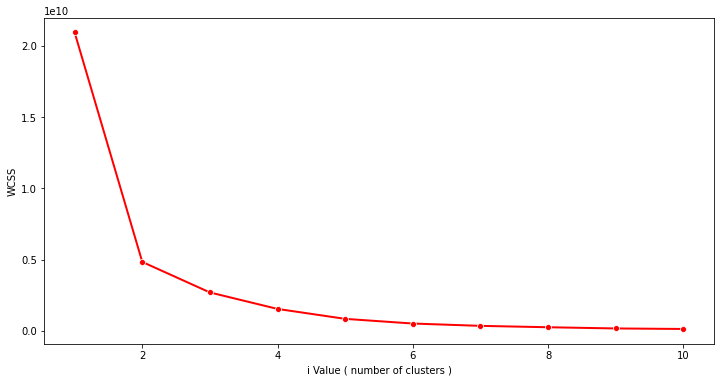

In [162]:
#the elbow curve
plt.figure(figsize=(12,6))
sns.lineplot(x=range(1,11), y= wcss, linewidth=2, color="red", marker="o")
plt.xlabel("i Value ( number of clusters )")
plt.ylabel("WCSS")
plt.show()

In [167]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X)

In [168]:
X_train

array([[-8.16756943e-01, -6.17164518e-01],
       [ 7.63201322e-01, -3.02090710e-01],
       [ 4.91645995e-01, -2.85398647e-01],
       [-2.37202836e+00, -3.26252897e-01],
       [ 5.90393387e-01,  5.96647115e-01],
       [ 5.78049963e-01,  5.87313504e-01],
       [ 3.92898604e-01, -6.37228870e-01],
       [ 1.38037252e+00,  4.61573924e+00],
       [ 1.21990801e+00,  3.41073988e+00],
       [ 1.33686701e-01, -6.66618046e-01],
       [ 5.53363115e-01,  0.00000000e+00],
       [ 6.52110506e-01,  1.44949760e+00],
       [ 2.25958854e-02, -6.60461961e-01],
       [ 4.79302571e-01,  7.82783983e-01],
       [ 8.43130050e-02, -1.15579403e-01],
       [ 1.17053431e+00, -2.64445381e-01],
       [-7.61515062e-02, -2.18341100e-01],
       [-1.43392814e+00, -5.98494707e-01],
       [-2.24272593e-01, -4.27427925e-01],
       [ 6.64453930e-01,  0.00000000e+00],
       [ 7.13827626e-01, -2.44053867e-01],
       [-7.30352975e-01, -6.10221136e-02],
       [ 4.17585451e-01,  1.46966981e-01],
       [ 7.

In [169]:
#hierchy cllustering
from sklearn.cluster import AgglomerativeClustering

In [170]:
#the number of clusters from the plot 5 or 6 is good
hc_model = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")

In [171]:
hc_model.fit_predict(X_train)

array([4, 0, 0, 2, 3, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 0, 0, 2, 4, 0, 0, 4,
       0, 0, 0, 2, 2, 2, 0, 4, 2, 1, 2, 2, 0, 0, 0, 2, 4, 0, 3, 0, 0, 0,
       0, 4, 0, 2, 0, 0, 0, 0, 2, 4, 0, 4, 0, 0, 1, 4, 4, 0, 1, 2, 0, 0,
       0, 2, 2, 4, 2, 0, 3, 0, 4, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 4, 3,
       0, 4, 3, 0, 2, 2, 0, 3, 0, 4, 2, 0, 0, 2, 3, 2, 0, 0, 0, 4, 0, 0,
       2, 4, 4, 4, 1, 0, 0, 2, 2, 0, 3, 4, 3, 4, 0, 0, 4, 3, 0, 1, 0, 0,
       0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 2, 1, 0, 0, 4, 2, 4, 2, 3, 0, 2,
       0, 2, 0, 0, 4, 4, 0, 0, 4, 2, 0, 3, 0, 0, 4, 2, 0, 0, 0, 4, 0, 3,
       4, 0, 0, 0, 4, 2, 4])

In [198]:
X_train[:,]

array([[-8.16756943e-01, -6.17164518e-01],
       [ 7.63201322e-01, -3.02090710e-01],
       [ 4.91645995e-01, -2.85398647e-01],
       [-2.37202836e+00, -3.26252897e-01],
       [ 5.90393387e-01,  5.96647115e-01],
       [ 5.78049963e-01,  5.87313504e-01],
       [ 3.92898604e-01, -6.37228870e-01],
       [ 1.38037252e+00,  4.61573924e+00],
       [ 1.21990801e+00,  3.41073988e+00],
       [ 1.33686701e-01, -6.66618046e-01],
       [ 5.53363115e-01,  0.00000000e+00],
       [ 6.52110506e-01,  1.44949760e+00],
       [ 2.25958854e-02, -6.60461961e-01],
       [ 4.79302571e-01,  7.82783983e-01],
       [ 8.43130050e-02, -1.15579403e-01],
       [ 1.17053431e+00, -2.64445381e-01],
       [-7.61515062e-02, -2.18341100e-01],
       [-1.43392814e+00, -5.98494707e-01],
       [-2.24272593e-01, -4.27427925e-01],
       [ 6.64453930e-01,  0.00000000e+00],
       [ 7.13827626e-01, -2.44053867e-01],
       [-7.30352975e-01, -6.10221136e-02],
       [ 4.17585451e-01,  1.46966981e-01],
       [ 7.

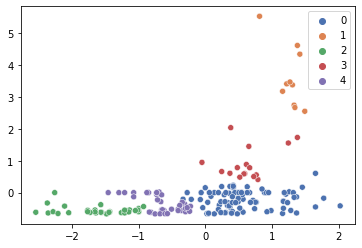

In [205]:
sns.scatterplot(x=X_train[:,0], y=X_train[:,1],hue=hc_model.labels_, palette="deep", legend="brief")

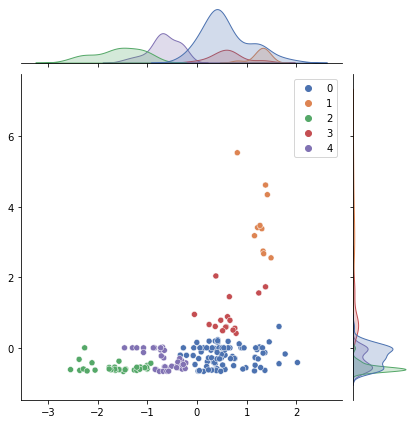

In [206]:
sns.jointplot(x=X_train[:,0], y=X_train[:,1],hue=hc_model.labels_, palette="deep", legend="brief")

In [207]:
#the number of clusters from the plot 5 or 6 is good
km = KMeans(n_clusters=5)
#fitting the data
km.fit(X)
#the prediction
y=km.predict(X)

In [208]:
#adding the new column at the end of the table
data["Cluster_Label"] = y

In [209]:
data.head()

,Country,Status,Life expectancy,GDP,Cluster_Label
0,Afghanistan,Developing,65.0,584.259210,2
1,Albania,Developing,77.8,3954.227830,2
2,Algeria,Developing,75.6,4132.762920,2
3,Angola,Developing,52.4,3695.793748,2
4,Antigua and Barbuda,Developing,76.4,13566.954100,4


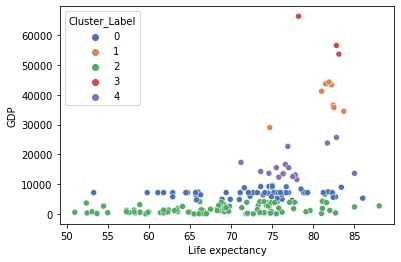

In [210]:
#scatterplot for life expectancy and gdp with hue based on the cluster label
sns.scatterplot(data=data, x= "Life expectancy", y = "GDP", palette="deep", hue="Cluster_Label")

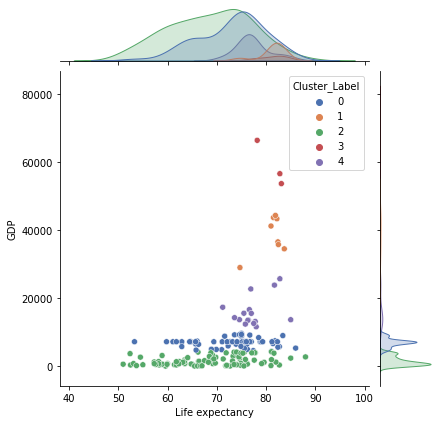

In [211]:
#jointplot for life expectancy and gdp with hue based on the cluster label
sns.jointplot(data=data, x= "Life expectancy", y = "GDP", palette="deep", hue="Cluster_Label")

In [212]:
data[data["Cluster_Label"]==0]

,Country,Status,Life expectancy,GDP,Cluster_Label
10,Bahamas,Developing,76.1,7185.331746,0
14,Belarus,Developing,72.3,5949.116770,0
15,Belgium,Developed,81.1,4356.875000,0
16,Belize,Developing,71.0,4849.997495,0
19,Bolivia (Plurinational State of),Developing,77.0,7185.331746,0
...,...,...,...,...,...
173,United Republic of Tanzania,Developing,61.8,7185.331746,0
174,United States of America,Developed,79.3,7185.331746,0
178,Venezuela (Bolivarian Republic of),Developing,74.1,7185.331746,0
179,Viet Nam,Developing,76.0,7185.331746,0


In [213]:
data[data["Cluster_Label"]==1]

,Country,Status,Life expectancy,GDP,Cluster_Label
8,Austria,Developed,81.5,43665.94700,1
31,Canada,Developing,82.2,43315.74400,1
58,France,Developing,82.4,36526.77110,1
62,Germany,Developed,81.0,41176.88158,1
79,Israel,Developing,82.5,35729.37253,1
82,Japan,Developed,83.7,34474.13736,1
87,Kuwait,Developing,74.7,28975.41800,1
114,Netherlands,Developed,81.9,44292.88473,1


In [214]:
data[data["Cluster_Label"]==2]

,Country,Status,Life expectancy,GDP,Cluster_Label
0,Afghanistan,Developing,65.0,584.259210,2
1,Albania,Developing,77.8,3954.227830,2
2,Algeria,Developing,75.6,4132.762920,2
3,Angola,Developing,52.4,3695.793748,2
6,Armenia,Developing,74.8,369.654776,2
...,...,...,...,...,...
171,United Arab Emirates,Developing,77.1,3911.746890,2
176,Uzbekistan,Developing,69.4,2137.576852,2
177,Vanuatu,Developing,72.0,285.834140,2
181,Zambia,Developing,61.8,1313.889646,2


In [215]:
data[data["Cluster_Label"]==3]

,Country,Status,Life expectancy,GDP,Cluster_Label
7,Australia,Developed,82.8,56554.38760,3
129,Qatar,Developing,78.2,66346.52267,3
144,Singapore,Developed,83.1,53629.73746,3


In [216]:
data[data["Cluster_Label"]==4]

,Country,Status,Life expectancy,GDP,Cluster_Label
4,Antigua and Barbuda,Developing,76.4,13566.95410,4
5,Argentina,Developing,76.3,13467.12360,4
11,Bahrain,Developing,76.9,22688.87824,4
13,Barbados,Developing,75.5,15557.83810,4
34,Chile,Developing,85.0,13653.22640,4
40,Croatia,Developed,78.0,11579.66740,4
72,Hungary,Developed,75.8,12365.62630,4
90,Latvia,Developed,74.6,13666.58336,4
95,Lithuania,Developed,73.6,14252.42853,4
102,Malta,Developed,81.7,23819.46360,4
